In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
train_data_path = (r'C:\Users\samha\Documents\Samuel_ZroNet\Me\python\Jupyter files\Titanic Survival Project\ML-titanic-survival-prediction\train.csv')
train_data = pd.read_csv(train_data_path)

In [87]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'embarked'],
      dtype='object')

In [88]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [90]:
#missing data in ages

In [91]:
#benchmark submission file predicted the survival of females and the death of females

In [92]:
#so let's check
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Percentage of women who survived:", rate_women)

Percentage of women who survived: 0.7420382165605095


In [93]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [94]:
#uhhh little truth hereeeeee

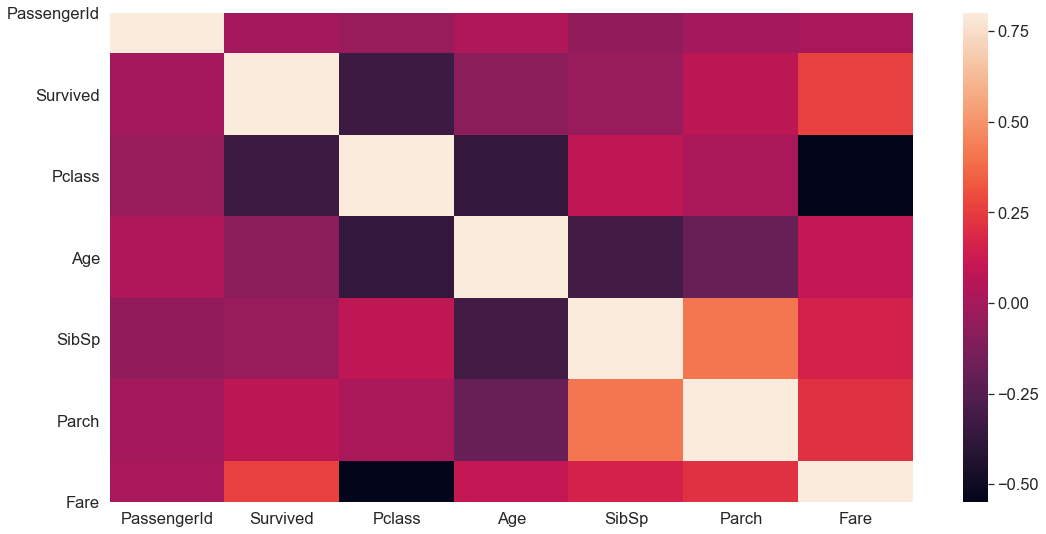

In [95]:
corrmat = train_data.corr()
f, ax = plt.subplots(figsize=(18, 9))
sns.heatmap(corrmat, vmax=.8, square=False);

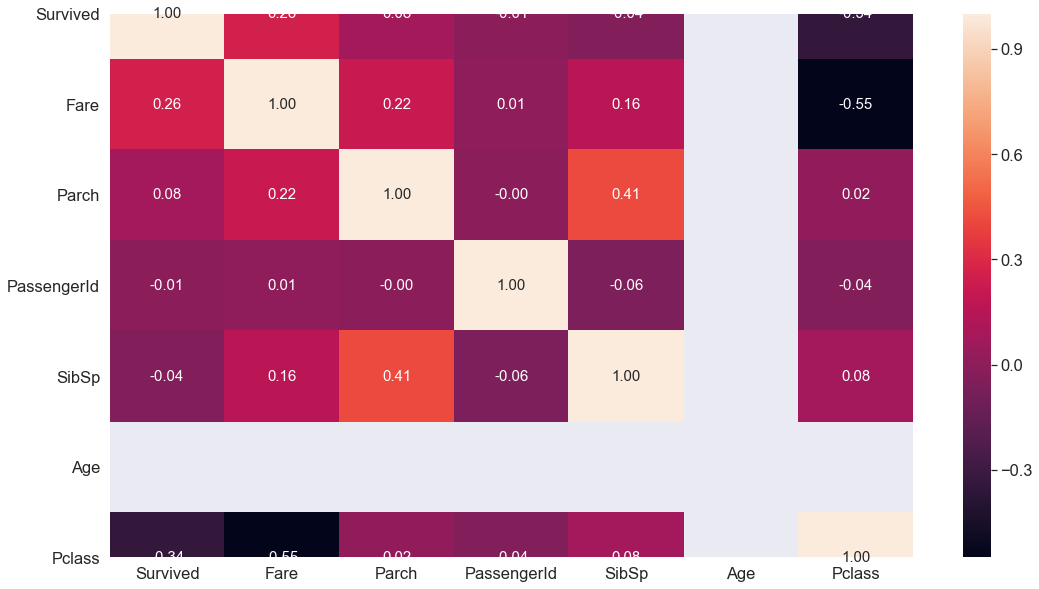

In [96]:
#taking a closer look
#'Survived' correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(18,10))
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [97]:
#dealing with missing values
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [98]:
train_data = train_data.drop((missing_data[missing_data['Total'] > 1]).index,1)
train_data.isnull().sum().max() #just checking that there's no data missing...

0

In [99]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["Survived"]

#correlated features= Fare, Parch
#in decreasing MAE, add Sex

features = ["Fare", "Pclass", "Sex", "Parch"]
X = pd.get_dummies(train_data[features])
X.head(20)


,Fare,Pclass,Parch,Sex_female,Sex_male
0,7.2500,3,0,0,1
1,71.2833,1,0,1,0
2,7.9250,3,0,1,0
3,53.1000,1,0,1,0
4,8.0500,3,0,0,1
5,8.4583,3,0,0,1
6,51.8625,1,0,0,1
7,21.0750,3,1,0,1
8,11.1333,3,2,1,0
9,30.0708,2,0,1,0


In [100]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [101]:
model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
model.fit(train_X, train_y)
predictions = model.predict(val_X)

In [102]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, predictions))

0.19282511210762332


In [103]:
test_data_path =(r'C:\Users\samha\Documents\Samuel_ZroNet\Me\python\Jupyter files\Titanic Survival Project\ML-titanic-survival-prediction\test.csv')
test_data = pd.read_csv(test_data_path)

In [104]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [105]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [106]:
#dealing with missing values
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [107]:
#test_data = test_data.drop(test_data.loc[test_data['Fare'].isnull()].index)
#test_data.isnull().sum().max() #just checking that there's no data missing...
test_data.sort_values(by = 'Fare', ascending = True)[:5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0000,B52 B54 B56,S
21,913,3,"Olsen, Master. Artur Karl",male,9.0,0,1,C 17368,3.1708,NaN,S
133,1025,3,"Thomas, Mr. Charles P",male,NaN,1,0,2621,6.4375,NaN,C
116,1008,3,"Thomas, Mr. John",male,NaN,0,0,2681,6.4375,NaN,C


In [108]:
test_data.mean()

PassengerId    1100.500000
Pclass            2.265550
Age              30.272590
SibSp             0.447368
Parch             0.392344
Fare             35.627188
dtype: float64

In [109]:
test_data['Fare'].fillna((test_data['Fare'].mean()), inplace=True)

In [110]:
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)
print(predictions)


[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [111]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
